In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import math
import time
import sys
import os
import random
import pickle

import numpy as np

import keras
import keras.layers
import keras.applications
import keras.backend
import keras.preprocessing.image
import keras.utils
import tensorflow as tf

import cv2
import PIL
import PIL.Image
import matplotlib.pyplot as plt

import shutil

In [ ]:
import os
mkP='/content/drive/MyDrive/0PV/-10V_eyes'
zP='/content/drive/MyDrive/0PV/0V_eyes'
kP='/content/drive/MyDrive/0PV/10V_eyes'

dme = os.listdir(mkP)
dmla=os.listdir(zP)
nor=os.listdir(kP)

print('-10V',len(mkP))
print('0V',len(zP))
print('10V',len(kP))


-10V 36
0V 34
10V 35


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
from PIL import Image,ImageFilter,ImageEnhance

In [ ]:
datapath="/content/drive/MyDrive/0PV"

#Step 1: Preprocessing 

data_dir_list = os.listdir(datapath)
num_classes = 3
img_data_list=[]
for dataset in data_dir_list:
    img_list=os.listdir(datapath+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
      input_img=cv2.imread(datapath + '/'+ dataset + '/'+ img )
      img=cv2.resize(input_img,(224,224))
     # img=cv2.imread(image_path, cv2.IMREAD_COLOR)
      im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      _, mask = cv2.threshold(im_gray, thresh=70, maxval=255, type=cv2.THRESH_BINARY)
      mask3 = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)  # 3 channel mask
      im_thresh_color = cv2.bitwise_and(img, mask3)
      img_data_list.append(im_thresh_color)

Loaded the images of dataset-0V_eyes

Loaded the images of dataset--10V_eyes

Loaded the images of dataset-10V_eyes



In [ ]:
#Normalization
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

(867, 224, 224, 3)


In [ ]:
import sklearn
from sklearn import preprocessing
from sklearn.utils import shuffle
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
# Define the number of classes
num_classes = 3

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:288]=0
labels[288:528]=1
labels[528:867]=2


names = ['10V','-10V','0V']
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [ ]:
print(len(X_train))

606


In [ ]:
print(len(X_test))

261


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Model
from keras.layers import Input
import tensorflow as tf
import keras


input_shape = (224, 224, 3)
vgg = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
for layer in vgg.layers:
  layer.trainable= False

import tensorflow as tf
#By specifying the include_top=False argument, you load a network that doesn’t include the classification layers at the top.
base_model = keras.applications.vgg16.VGG16(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")
base_model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
print(len(base_model.layers))

19


In [ ]:
base_model.trainable = False
model1 = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.1),
                                 tf.keras.layers.Dense(3, activation="softmax")                                     
                                ])
model1.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=["accuracy"])
history = model1.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=10,
    validation_data=(X_test,y_test))


Epoch 1/10
5/5 [==============================] - 72s 7s/step - loss: 1.1714 - accuracy: 0.3218 - val_loss: 1.1028 - val_accuracy: 0.3563
Epoch 2/10
5/5 [==============================] - 7s 1s/step - loss: 1.0911 - accuracy: 0.4043 - val_loss: 1.0986 - val_accuracy: 0.4100
Epoch 3/10
5/5 [==============================] - 7s 1s/step - loss: 1.1045 - accuracy: 0.3960 - val_loss: 1.1048 - val_accuracy: 0.4061
Epoch 4/10
5/5 [==============================] - 7s 1s/step - loss: 1.0875 - accuracy: 0.3812 - val_loss: 1.0949 - val_accuracy: 0.4253
Epoch 5/10
5/5 [==============================] - 7s 1s/step - loss: 1.0921 - accuracy: 0.3663 - val_loss: 1.0808 - val_accuracy: 0.3793
Epoch 6/10
5/5 [==============================] - 7s 1s/step - loss: 1.0718 - accuracy: 0.4109 - val_loss: 1.0730 - val_accuracy: 0.3602
Epoch 7/10
5/5 [==============================] - 7s 1s/step - loss: 1.0679 - accuracy: 0.4274 - val_loss: 1.0683 - val_accuracy: 0.3678
Epoch 8/10
5/5 [========================

In [ ]:
results = model1.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

3/3 [==============================] - 2s 537ms/step - loss: 1.0561 - accuracy: 0.4100
test loss, test acc: [1.056141972541809, 0.4099617004394531]


In [ ]:
base_model.trainable = False
model1 = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.1),
                                 tf.keras.layers.Dense(3, activation="softmax")                                     
                                ])
model1.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=["accuracy"])
history = model1.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=50,
    validation_data=(X_test,y_test))


Epoch 1/50
5/5 [==============================] - 8s 1s/step - loss: 1.1323 - accuracy: 0.3894 - val_loss: 1.0873 - val_accuracy: 0.3870
Epoch 2/50
5/5 [==============================] - 7s 1s/step - loss: 1.0842 - accuracy: 0.3861 - val_loss: 1.0887 - val_accuracy: 0.4330
Epoch 3/50
5/5 [==============================] - 7s 1s/step - loss: 1.1085 - accuracy: 0.3531 - val_loss: 1.0870 - val_accuracy: 0.4023
Epoch 4/50
5/5 [==============================] - 7s 1s/step - loss: 1.0828 - accuracy: 0.3993 - val_loss: 1.0751 - val_accuracy: 0.4023
Epoch 5/50
5/5 [==============================] - 7s 1s/step - loss: 1.0831 - accuracy: 0.3894 - val_loss: 1.0712 - val_accuracy: 0.3908
Epoch 6/50
5/5 [==============================] - 7s 1s/step - loss: 1.0822 - accuracy: 0.4076 - val_loss: 1.0666 - val_accuracy: 0.3985
Epoch 7/50
5/5 [==============================] - 7s 1s/step - loss: 1.0714 - accuracy: 0.4125 - val_loss: 1.0629 - val_accuracy: 0.4023
Epoch 8/50
5/5 [=========================

In [ ]:
base_model.trainable = False
model1 = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.1),
                                 tf.keras.layers.Dense(3, activation="softmax")                                     
                                ])
model1.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=["accuracy"])
history = model1.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=150,
    validation_data=(X_test,y_test))


Epoch 1/150
5/5 [==============================] - 8s 1s/step - loss: 1.2963 - accuracy: 0.2937 - val_loss: 1.1702 - val_accuracy: 0.3831
Epoch 2/150
5/5 [==============================] - 7s 1s/step - loss: 1.1399 - accuracy: 0.3960 - val_loss: 1.0990 - val_accuracy: 0.3755
Epoch 3/150
5/5 [==============================] - 7s 1s/step - loss: 1.1052 - accuracy: 0.3894 - val_loss: 1.0988 - val_accuracy: 0.3563
Epoch 4/150
5/5 [==============================] - 7s 1s/step - loss: 1.1155 - accuracy: 0.3630 - val_loss: 1.1108 - val_accuracy: 0.3716
Epoch 5/150
5/5 [==============================] - 7s 1s/step - loss: 1.0943 - accuracy: 0.3878 - val_loss: 1.1026 - val_accuracy: 0.3908
Epoch 6/150
5/5 [==============================] - 7s 1s/step - loss: 1.0804 - accuracy: 0.4125 - val_loss: 1.0884 - val_accuracy: 0.4253
Epoch 7/150
5/5 [==============================] - 7s 1s/step - loss: 1.0760 - accuracy: 0.4059 - val_loss: 1.0785 - val_accuracy: 0.3985
Epoch 8/150
5/5 [=================

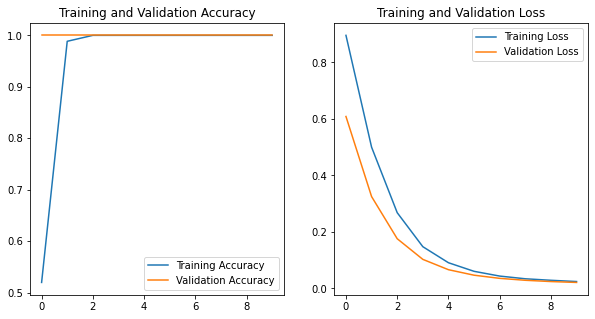

In [ ]:
epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy'] 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.initializers import glorot_normal
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.applications.inception_resnet_v2 import InceptionResNetV2
def outer_product(x):
    """
    calculate outer-products of 2 tensors

        args 
            x
                list of 2 tensors
                , assuming each of which has shape = (size_minibatch, total_pixels, size_filter)
    """
    return keras.backend.batch_dot(
                x[0]
                , x[1]
                , axes=[1,1]
            ) / x[0].get_shape().as_list()[1] 

def signed_sqrt(x):
    """
    calculate element-wise signed square root

        args
            x
                a tensor
    """
    return keras.backend.sign(x) * keras.backend.sqrt(keras.backend.abs(x) + 1e-9)

def L2_norm(x, axis=-1):
    """
    calculate L2-norm

        args 
            x
                a tensor
    """
    return keras.backend.l2_normalize(x, axis=axis)


def build_model(
    size_heigth=224
    ,size_width=224
    ,no_class=3
    ,no_last_layer_backbone=778

    
    ,name_optimizer="sgd"
    ,rate_learning=1.0
    ,rate_decay_learning=0.0
    ,rate_decay_weight=0.0
    
    ,name_initializer="glorot_normal"
    ,name_activation_logits="softmax"
    ,name_loss="categorical_crossentropy"

    ,flg_debug=False
    ,**kwargs
):
    
    keras.backend.clear_session()
    
    print("-------------------------------")
    print("parameters:")
    for key, val in locals().items():
        if not val == None and not key == "kwargs":
            print("\t", key, "=",  val)
    print("-------------------------------")
    
    ### 
    ### load pre-trained model
    ###
    tensor_input = keras.layers.Input(shape=[size_heigth,size_width,3])
    model_detector = keras.applications.inception_resnet_v2.InceptionResNetV2(
                            input_tensor=tensor_input
                            , include_top=False
                            , weights='imagenet'
                        )
    

    ### 
    ### bi-linear pooling
    ###

    # extract features from detector
    x_detector = model_detector.layers[no_last_layer_backbone].output
    shape_detector = model_detector.layers[no_last_layer_backbone].output_shape
    if flg_debug:
        print("shape_detector : {}".format(shape_detector))

    # extract features from extractor , same with detector for symmetry DxD model
    shape_extractor = shape_detector
    x_extractor = x_detector
    if flg_debug:
        print("shape_extractor : {}".format(shape_extractor))
        
    
    # rehape to (minibatch_size, total_pixels, filter_size)
    x_detector = keras.layers.Reshape(
            [
                shape_detector[1] * shape_detector[2] , shape_detector[-1]
            ]
        )(x_detector)
    if flg_debug:
        print("x_detector shape after rehsape ops : {}".format(x_detector.shape))
        
    x_extractor = keras.layers.Reshape(
            [
                shape_extractor[1] * shape_extractor[2] , shape_extractor[-1]
            ]
        )(x_extractor)
    if flg_debug:
        print("x_extractor shape after rehsape ops : {}".format(x_extractor.shape))
        
        
    # outer products of features, output shape=(minibatch_size, filter_size_detector*filter_size_extractor)
    x = keras.layers.Lambda(outer_product)(
        [x_detector, x_extractor]
    )
    if flg_debug:
        print("x shape after outer products ops : {}".format(x.shape))
        
        
    # rehape to (minibatch_size, filter_size_detector*filter_size_extractor)
    x = keras.layers.Reshape([shape_detector[-1]*shape_extractor[-1]])(x)
    if flg_debug:
        print("x shape after rehsape ops : {}".format(x.shape))
        
        
    # signed square-root 
    x = keras.layers.Lambda(signed_sqrt)(x)
    if flg_debug:
        print("x shape after signed-square-root ops : {}".format(x.shape))
        
    # L2 normalization
    x = keras.layers.Lambda(L2_norm)(x)
    if flg_debug:
        print("x shape after L2-Normalization ops : {}".format(x.shape))



    ### 
    ### attach FC-Layer
    ###

    if name_initializer != None:
            name_initializer = eval(name_initializer+"()")
            
    x = keras.layers.Dense(
            units=no_class
            ,kernel_regularizer=keras.regularizers.l2(rate_decay_weight)
            ,kernel_initializer=name_initializer
        )(x)
    if flg_debug:
        print("x shape after Dense ops : {}".format(x.shape))
    tensor_prediction = keras.layers.Activation(name_activation_logits)(x)
    if flg_debug:
        print("prediction shape : {}".format(tensor_prediction.shape))

        

    ### 
    ### compile model
    ###
    model_bilinear = keras.models.Model(
                        inputs=[tensor_input]
                        , outputs=[tensor_prediction]
                    )
    
    
    # fix pre-trained weights
    for layer in model_detector.layers:
        layer.trainable = False
        
        
    # define optimizers
    #opt_adam = keras.optimizers.adam(
                  #  lr=rate_learning
                  #  , decay=rate_decay_learning
               # )
    opt_rms = keras.optimizers.RMSprop(
                    lr=rate_learning
                    , decay=rate_decay_learning
                )
    opt_sgd = keras.optimizers.SGD(
                    lr=rate_learning
                    , decay=rate_decay_learning
                    , momentum=0.9
                    , nesterov=False
                )
    optimizers ={
        #"Adam":opt_adam
        "rmsprop":opt_rms
        ,"sgd":opt_sgd
    }
    
    model_bilinear.compile(
        loss=name_loss
        , optimizer=optimizers[name_optimizer]
        , metrics=["categorical_accuracy"]
    )
    
    
    
    if flg_debug:
        model_bilinear.summary()
        print(no_last_layer_backbone)
    
    return model_bilinear

In [ ]:
NO_CLASS=3
from keras.optimizers import Adam
model = build_model(
            
            no_class = NO_CLASS

            # pretrained model specification, using VGG16
            # "block5_conv3 "
            ,no_last_layer_backbone = 778
            #,no_last_layer_backbone1 = 108
    
            # training parametes
            ,rate_learning=1.0
            ,rate_decay_weight=1e-8
    
            ,flg_debug=True
        )

-------------------------------
parameters:
	 size_heigth = 224
	 size_width = 224
	 no_class = 3
	 no_last_layer_backbone = 778
	 name_optimizer = sgd
	 rate_learning = 1.0
	 rate_decay_learning = 0.0
	 rate_decay_weight = 1e-08
	 name_initializer = glorot_normal
	 name_activation_logits = softmax
	 name_loss = categorical_crossentropy
	 flg_debug = True
-------------------------------
219070464/219055592 [==============================] - 1s 0us/step
shape_detector : (None, 5, 5, 1536)
shape_extractor : (None, 5, 5, 1536)
x_detector shape after rehsape ops : (None, 25, 1536)
x_extractor shape after rehsape ops : (None, 25, 1536)
x shape after outer products ops : (None, 1536, 1536)
x shape after rehsape ops : (None, 2359296)
x shape after signed-square-root ops : (None, 2359296)
x shape after L2-Normalization ops : (None, 2359296)
x shape after Dense ops : (None, 3)
prediction shape : (None, 3)
Model: "model"
___________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


activation_29 (Activation)      (None, 25, 25, 64)   0           batch_normalization_29[0][0]     
__________________________________________________________________________________________________
block35_3_mixed (Concatenate)   (None, 25, 25, 128)  0           activation_24[0][0]              
                                                                 activation_26[0][0]              
                                                                 activation_29[0][0]              
__________________________________________________________________________________________________
block35_3_conv (Conv2D)         (None, 25, 25, 320)  41280       block35_3_mixed[0][0]            
__________________________________________________________________________________________________
block35_3 (Lambda)              (None, 25, 25, 320)  0           block35_2_ac[0][0]               
                                                                 block35_3_conv[0][0]             
__________

In [ ]:
history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=30,
    validation_data=(X_test,y_test))

Epoch 1/30
24/24 [==============================] - 129s 2s/step - loss: 0.9440 - categorical_accuracy: 0.5824 - val_loss: 0.5899 - val_categorical_accuracy: 0.7652
Epoch 2/30
24/24 [==============================] - 25s 1s/step - loss: 0.5441 - categorical_accuracy: 0.7943 - val_loss: 0.4623 - val_categorical_accuracy: 0.8332
Epoch 3/30
24/24 [==============================] - 26s 1s/step - loss: 0.4328 - categorical_accuracy: 0.8383 - val_loss: 0.4067 - val_categorical_accuracy: 0.8569
Epoch 4/30
24/24 [==============================] - 27s 1s/step - loss: 0.3723 - categorical_accuracy: 0.8662 - val_loss: 0.3547 - val_categorical_accuracy: 0.8838
Epoch 5/30
24/24 [==============================] - 26s 1s/step - loss: 0.3345 - categorical_accuracy: 0.8898 - val_loss: 0.3240 - val_categorical_accuracy: 0.8854
Epoch 6/30
24/24 [==============================] - 26s 1s/step - loss: 0.2939 - categorical_accuracy: 0.9135 - val_loss: 0.3116 - val_categorical_accuracy: 0.8925
Epoch 7/30
24/2

In [ ]:
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

10/10 [==============================] - 8s 772ms/step - loss: 0.1632 - categorical_accuracy: 0.9470
test loss, test acc: [0.16318686306476593, 0.947035551071167]


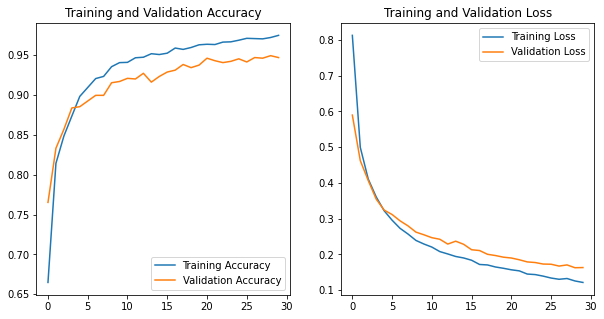

In [ ]:
epochs=30
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy'] 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()